In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pandas as pd

dt 0.9830399940256029
times (192,)
cal_ts (192,)


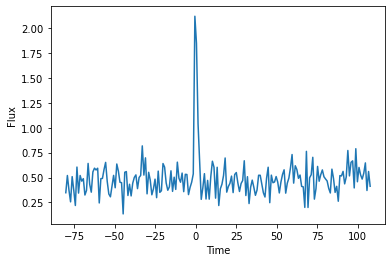

In [3]:
for file_name in glob.glob("/mnt/c/Users/Mariska Hoogkamer/Documents/UvA/FRBs/*.h5"):
    # '/Users/tesstangney/Desktop/Final Project/Jupyter Notebooks/h5_to_csv/H5files/*.h5'):
    data = h5py.File(file_name, "r")

    plot_time = data["frb"]["plot_time"][:]
    ts = data["frb"]["ts"][:]
    cal_wfall =  data["frb"]["calibrated_wfall"][:]
    dt = np.median(np.diff(plot_time)) # the delta (time) between time bins 
    
    print('dt', dt)
    
    peak_idx = np.argmax(ts)  # ts from wfall
    cal_ts = np.nanmean(cal_wfall, axis = 0) #flattening the calibrated wfall ?? 
    cal_wfall[np.isnan(cal_wfall)] = np.nanmedian(cal_wfall)   # replace nans in the data with the data median
    times = np.arange(len(cal_ts))*dt 
    peak_idx = np.argmax(cal_ts)
    times -= times[peak_idx]
    times -= dt / 2.
    print('times', times.shape)
    print('cal_ts', cal_ts.shape)
    plt.plot(times, cal_ts)
    plt.xlabel('Time')
    plt.ylabel('Flux')
    plt.show()

    # convert numpy array to dataframe
    # adding time and flux error columns
    df = pd.DataFrame(times, columns=['times'])
    df['ytrue'] = cal_ts # flux values
    df['yerr'] = 1.0e0 # flux errors 

    # convert dataframe to .dat file 
    position = file_name.index('.')
    df.to_csv(file_name[0:position]+".dat", sep=" ", header=False, index=False) ## FIX so that the .dat file doesn't include a header 

    # # Save LC as csv
    # info = np.column_stack((times, cal_ts))
    # position = file_name.index('.')
    # np.savetxt(file_name[0:position]+".dat", info, delimiter=" ")

In [4]:
#lightcurve(file)